process start
end of data mungging
日付　　アクセス数
ymd
2024-03-31      78
2024-04-01     153
2024-04-02      66
2024-04-03     179
2024-04-04     188
2024-04-05      85
2024-04-06     234
2024-04-07     112
2024-04-08      65
2024-04-09     316
2024-04-10     144
2024-04-11      84
2024-04-12      96
2024-04-13      82
2024-04-14      90
2024-04-15      98
2024-04-16     125
2024-04-17     129
2024-04-18      93
2024-04-19      77
2024-04-20      93
2024-04-21     326
2024-04-22     111
2024-04-23     206
2024-04-24     127
2024-04-25     368
2024-04-26     339
2024-04-27    2370
2024-04-28     113
2024-04-29     832
2024-04-30    6834
Name: count, dtype: int64
IPアドレス　　アクセス数
from_ip_address
104.211.2.187      7594
173.249.5.74       2146
174.138.2.203       430
3.239.82.142        256
175.139.231.105     233
128.199.137.235     229
146.19.24.28        186
221.234.33.109      154
195.140.227.163     153
185.224.128.43      136
Name: count, dtype: int64
URL
url
POST /xmlrpc.php HTTP/1.1       

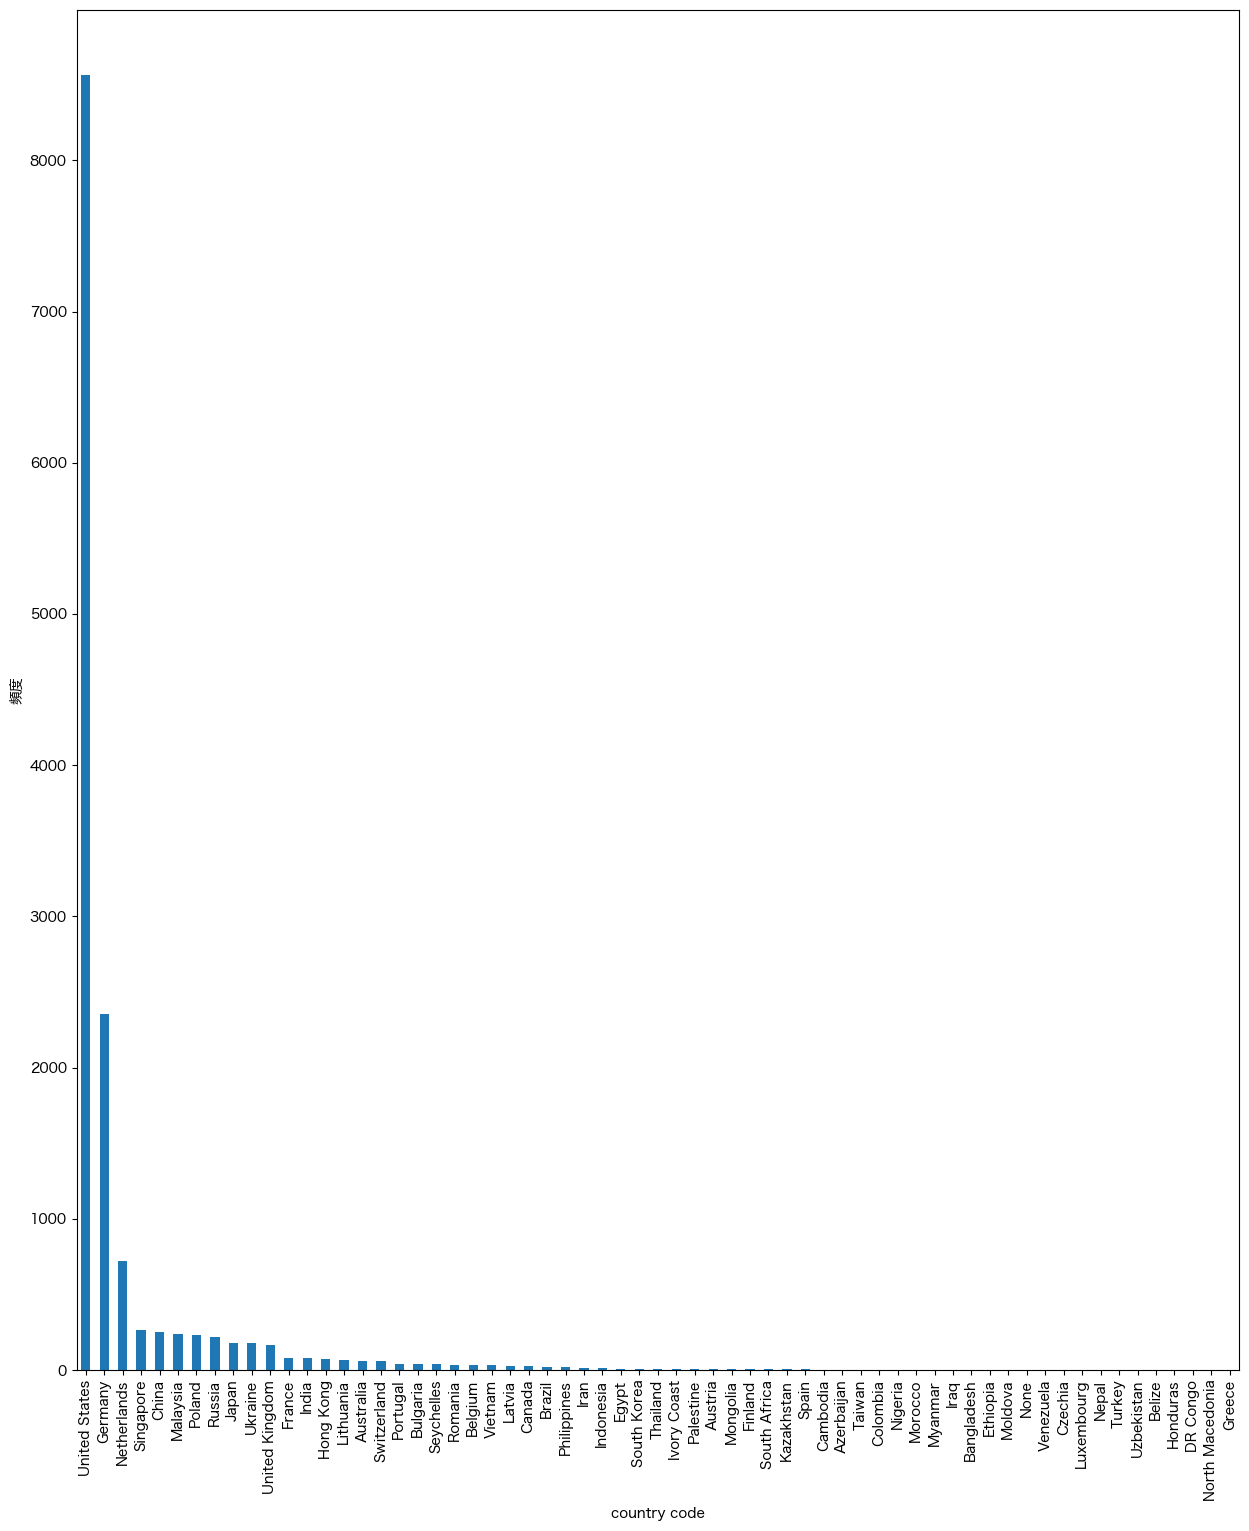

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import base64
import geoip2.database
import time as t
warnings.simplefilter('ignore')
%matplotlib inline

class log_analytic_code:
    def __init__(self,fpass,ip_dict):
        import pandas as pd
        import matplotlib.pyplot as plt
        import warnings
        import base64
        warnings.simplefilter('ignore')
        %matplotlib inline
        self.fpass = pd.read_csv(fpass,delimiter=' ',names=('ymd','time','from_ip_address','to_ip_address','HTTP','status_code','TorF','basic64'))
        self.ip_dict = geoip2.database.Reader(ip_dict)
    
    def make_access_plot(self):
        print('日付　　アクセス数')
        print(self.fpass['ymd'].value_counts().sort_index())
        self.fpass['ymd'].value_counts().sort_index().to_csv('access_count.csv')
        plt.clf()
        self.fpass['ymd'].value_counts().plot(color='orange',figsize=(15,15))
        plt.xlabel('日付')
        plt.ylabel('アクセス数')
        plt.grid()
        plt.savefig('access_count.png')
    
    def make_ip_count(self,rank_c):
        print('IPアドレス　　アクセス数')
        plt.clf()
        self.fpass['from_ip_address'].value_counts().sort_values(ascending=False).head(rank_c).plot(kind='bar',figsize=(15,15))
        self.fpass['from_ip_address'].value_counts().sort_values(ascending=False).to_csv('ip.csv')
        print(self.fpass['from_ip_address'].value_counts().sort_values(ascending=False).head(rank_c))
        plt.ylabel('アクセス数')
        plt.xlabel('ipアドレス')
        plt.savefig('ip_address_count.png')
        
    def make_response_plot(self):
        print('ステータスコード')
        plt.clf()
        self.fpass['status_code'].value_counts().sort_values(ascending=False).to_csv('response_count.csv')
        self.fpass['status_code'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,20))
        print(self.fpass['status_code'].value_counts().sort_values(ascending=False))
        plt.ylabel('頻度')
        plt.xlabel('ステータスコード')
        plt.savefig('status_code.png')
        
    def make_url_plot(self,rank_c):
        print('URL')
        plt.clf()
        self.fpass['url'].value_counts().sort_values(ascending=False).head(rank_c).plot(kind='bar',figsize=(15,20))
        self.fpass['url'].value_counts().sort_values(ascending=False).to_csv('url.csv')
        print(self.fpass['url'].value_counts().sort_values(ascending=False))
        plt.ylabel('頻度')
        plt.xlabel('url')
        plt.savefig('url.png')
    
    def make_httpres_plot(self):
        print('HTTPレスポンス')
        plt.clf()
        self.fpass['res'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,20))
        print(self.fpass['res'].value_counts().sort_values(ascending=False))
        self.fpass['res'].value_counts().sort_values(ascending=False).to_csv('HTTPres.csv')
        plt.ylabel('頻度')
        plt.xlabel('res')
        plt.savefig('res.png')        
    
    def save_csv(self):
        self.fpass.to_csv('log_df.csv',index=False)
    
    def mung(self):
        print('process start')
        self.fpass['ymd']=self.fpass['ymd'].str.replace('[','')
        self.fpass['time']=self.fpass['time'].str.replace(']','')
        self.fpass['time']=pd.to_datetime(self.fpass['ymd'] + ' ' + self.fpass['time'],format='%Y-%m-%d %H:%M:%S+0900')
        self.fpass['ymd']=pd.to_datetime(self.fpass['ymd'],format='%Y-%m-%d')
        for i in range(0,len(self.fpass['basic64'])):
            self.fpass['basic64'][i] = base64.b64decode(self.fpass['basic64'][i]).decode()
            
        self.fpass['res']=self.fpass['HTTP']
        self.fpass['url']=self.fpass['HTTP']
        self.fpass['country'] = self.fpass['from_ip_address']
        for i in range(0,len(self.fpass['HTTP'])):
            self.fpass['res'][i] = self.fpass['HTTP'].str.split()[i][0]

        for i in range(0,len(self.fpass['from_ip_address'])):
            try:
                self.fpass['country'][i] = self.ip_dict.city(self.fpass['from_ip_address'][i]).country.names['en']
            except:
                self.fpass['country'][i] = "None"
        print('end of data mungging')
            
        return self.fpass
    
    def ip_country(self):
        print('国別集計')
        plt.clf()
        self.fpass['country'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,20))
        print(self.fpass['country'].value_counts().sort_values(ascending=False))
        self.fpass['country'].value_counts().sort_values(ascending=False).to_csv('country.csv')
        plt.ylabel('頻度')
        plt.xlabel('country code')
        plt.savefig('country.png')   
        
if __name__ == "__main__":
    start = t.time()
    log_an = log_analytic_code('/Users/takishun/files/log20240430/log.txt','GeoLite2-City.mmdb') 
    try: 
        df = log_an.mung()
        log_an.make_access_plot()
        log_an.make_ip_count(10)
        log_an.make_url_plot(10)
        log_an.make_response_plot()
        log_an.make_httpres_plot()
        log_an.ip_country()
        log_an.save_csv()
    except:
        print('except')
    print('log_process_end: {}[sec]'.format(t.time()-start))

In [6]:
d = pd.read_csv('log_df.csv')